# We will determine sales figures and estimate which advertising to invest in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv('advertising.csv')

In [51]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='Newspaper'>

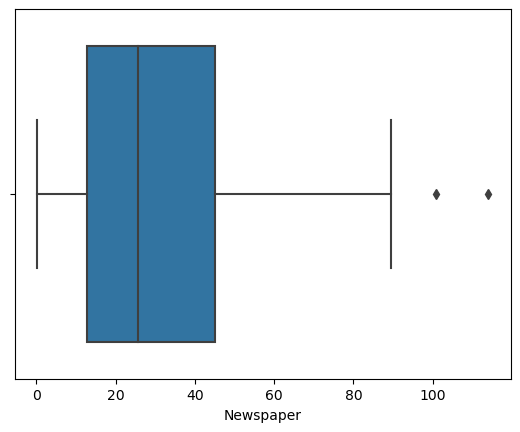

In [9]:
sns.boxplot(x=df['Newspaper']) 

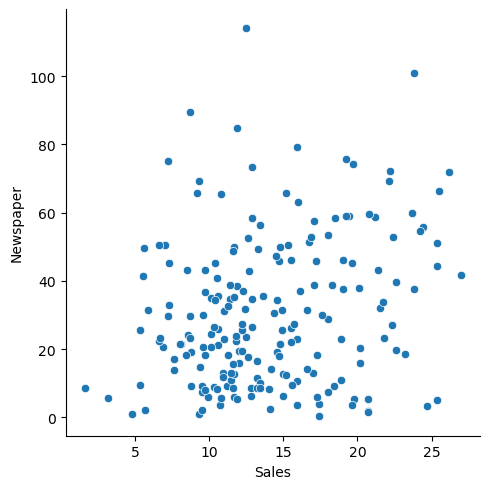

In [10]:
sns.relplot(x='Sales',y='Newspaper',palette='muted', data=df);

In [11]:
outliers=df.quantile(q=0.97, numeric_only=True)

In [12]:
df=df[(df['Newspaper']<outliers['Newspaper'])] 

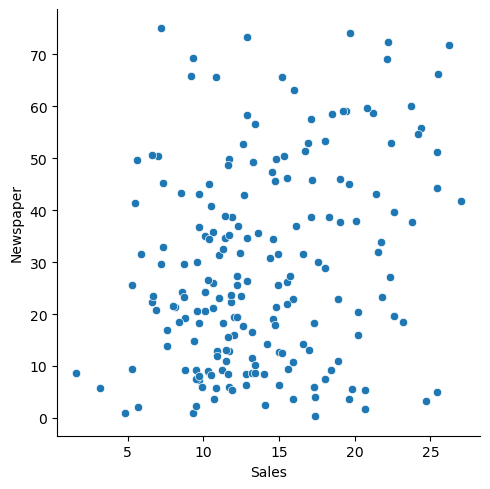

In [13]:
sns.relplot(x='Sales',y='Newspaper',palette='muted', data=df);

In [14]:
x= df[['TV', 'Radio', 'Newspaper']]

In [15]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y=df[['Sales']]

In [17]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
     
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
            
        
            


        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
  
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [19]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.984316,0.668947,0.538595
XGBRegressor,0.984313,0.669011,0.559495
Decision Tree,0.969184,0.937673,0.756410
Extra Tree,0.961563,1.047219,0.812821
KNeighborsRegressor,0.929284,1.420437,0.949744
Linear,0.899526,1.693127,1.267680
Ridge,0.899522,1.693161,1.267706
ElasticNet,0.897725,1.708236,1.277979
Lasso,0.896491,1.718508,1.284320


In [20]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
x= df[['TV']]
y=df[['Sales']]

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

Text(0.5, 1.0, 'Actual vs Predicted')

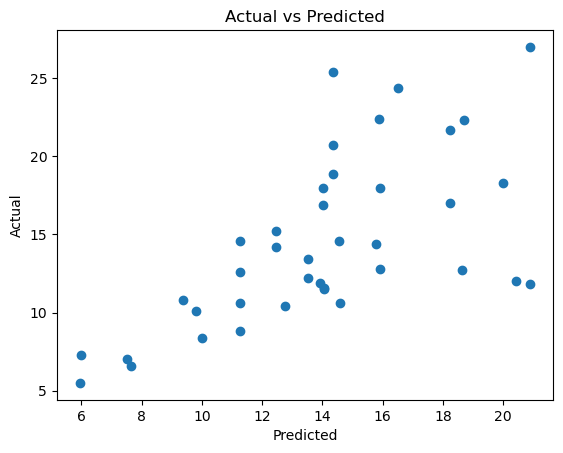

In [23]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'Actual vs Predicted')

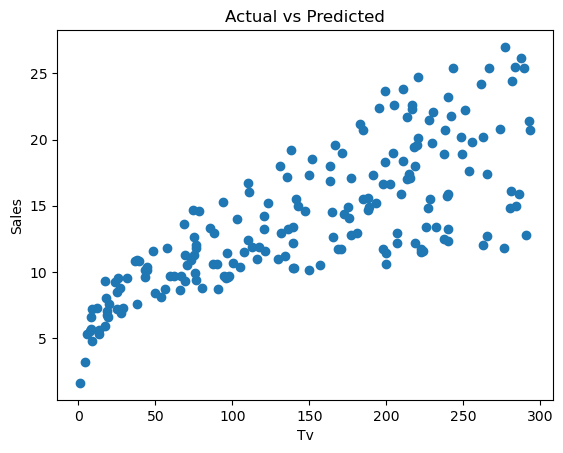

In [24]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'Actual vs Predicted')

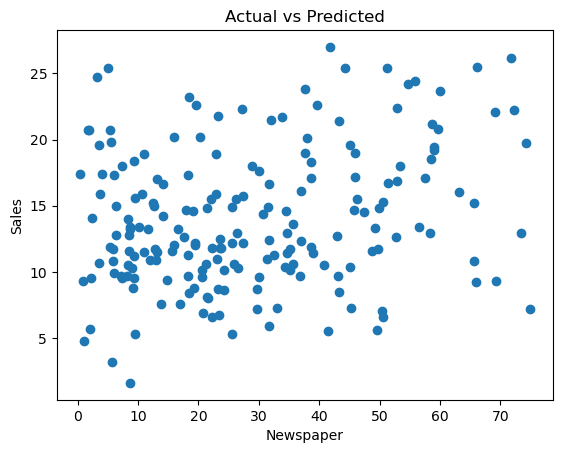

In [25]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'Actual vs Predicted')

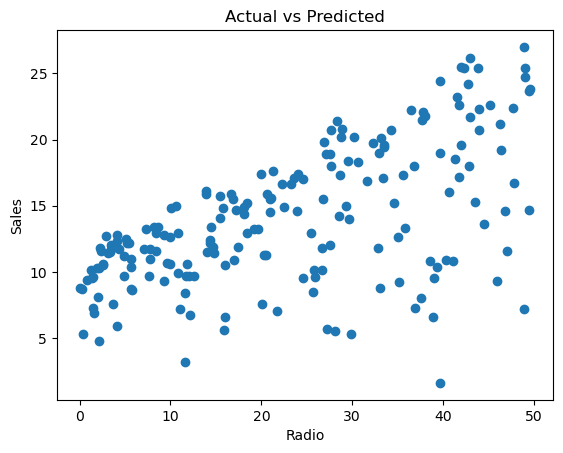

In [35]:
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Actual vs Predicted")

# R-scuared is by Gradient Boosting	0.984316

### [Click for more of my data analysis](https://github.com/salihBekdemir)